<a href="https://colab.research.google.com/github/GuoZhuyin/zhuyinasia/blob/main/FinalExam_ETH_USD_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from google.colab import files

In [ ]:
import os
drive.mount('/content/gdrive',force_remount=True)
os.chdir("/content/gdrive/MyDrive/亞洲大學/大三/資料科學")

Mounted at /content/gdrive


In [ ]:
!ls -la #確認雲端掛載成功

total 311946
-rw------- 1 root root     88736 Jan  7 09:50 Binance_ETHUSDT_d.csv
-rw------- 1 root root 317526599 Apr 11  2021 bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
-rw------- 1 root root    141255 Jan  7 12:44 eth_historical_max.csv
-rw------- 1 root root    102577 Jan  7 11:41 eth_usd.csv
-rw------- 1 root root    172623 Jan  7 12:04 FinalExam_BTC_USD.ipynb
-rw------- 1 root root    241849 Jan 11 08:30 FinalExam_ETH_USD_2019.ipynb
-rw------- 1 root root    341527 Jan 11 17:51 FinalExam_ETH_USD_LinearRegression.ipynb
-rw------- 1 root root     57997 Jan  9 18:29 FinalExam_ETH_USD_RNN2.ipynb
-rw------- 1 root root     65557 Jan 11 19:01 FinalExam_ETH_USD_RNN.ipynb
-rw------- 1 root root     19392 Jan  9 17:53 FinalExam_RNN.ipynb
-rw------- 1 root root    211929 Jan  7 10:40 FinalExam_YFinance_0050.ipynb
-rw------- 1 root root    241986 Jan  7 12:39 FinalExam_YFinance1.ipynb
-rw------- 1 root root    215408 Jan  7 09:53 FinalExam_YFinance2.ipynb
-rw------- 1 root root     

In [ ]:
eth=pd.DataFrame()
eth = pd.read_csv('./eth_historical_max.csv')
eth

,Date,Timestamp,Open,High,Low,Close,Adj Close,Volume
0,2017/11/9,1510185600,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017/11/10,1510272000,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017/11/11,1510358400,298.585998,319.453003,298.191986,314.681000,314.681000,842300992
3,2017/11/12,1510444800,314.690002,319.153015,298.513000,307.907989,307.907989,1613479936
4,2017/11/13,1510531200,307.024994,328.415008,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...,...
1516,2022/1/3,1641168000,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
1517,2022/1/4,1641254400,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
1518,2022/1/5,1641340800,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502
1519,2022/1/6,1641427200,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313


In [ ]:
eth.isnull().sum()
#確認有無null值
#.dropna能處理缺失值

Date         0
Timestamp    0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
eth.shape

(1521, 8)

In [ ]:
"""plt.figure(figsize = (12, 7))
plt.title("ETH_USD", size=20)
plt.xlabel("Date", size=10)
plt.ylabel("USD", size=10)
plt.plot(eth["Date"],eth["Adj Close"], lw=2)"""

'plt.figure(figsize = (12, 7))\nplt.title("ETH_USD", size=20)\nplt.xlabel("Date", size=10)\nplt.ylabel("USD", size=10)\nplt.plot(eth["Date"],eth["Adj Close"], lw=2)'

In [ ]:
"""plt.figure(figsize = (12, 7))
plt.title("ETH_Volume", size=20)
plt.xlabel("Date", size=10)
plt.ylabel("Volume", size=10)
plt.plot(eth["Date"],eth["Volume"])"""

'plt.figure(figsize = (12, 7))\nplt.title("ETH_Volume", size=20)\nplt.xlabel("Date", size=10)\nplt.ylabel("Volume", size=10)\nplt.plot(eth["Date"],eth["Volume"])'

In [ ]:
eth_a=eth[:int(np.round(len(eth)*0.7))] #過去
eth_b=eth[len(eth_a):] #現在

In [ ]:
eth_a_adjclose = eth_a.iloc[:,6:7].values  # 取「Adj Close」欄位值

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
eth_a_adjclose_scaled = scaler.fit_transform(eth_a_adjclose)
#資料預處理 數據處理為[0,1]之間 最小值為0 最大值為1
eth_a_adjclose_scaled.shape

(1065, 1)

In [ ]:
x_train = []   #抓60天前的資料到x_train
y_train = []   #第60天的資料
for i in range(60, len(eth_a_adjclose_scaled)):  # len(eth_a_adjclose_scaled)是訓練集總數
    x_train.append(eth_a_adjclose_scaled[i-60:i, 0])
    y_train.append(eth_a_adjclose_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
# 轉成numpy array的格式，以利輸入 RNN
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

[[0.18030149 0.16381584 0.175574   ... 0.69613863 0.72964194 0.81461183]
 [0.16381584 0.175574   0.17041208 ... 0.72964194 0.81461183 0.81107553]
 [0.175574   0.17041208 0.17712493 ... 0.81461183 0.81107553 0.92631721]
 ...
 [0.22498431 0.23601577 0.23383081 ... 0.19984106 0.20445722 0.20550726]
 [0.23601577 0.23383081 0.23746398 ... 0.20445722 0.20550726 0.19549216]
 [0.23383081 0.23746398 0.22564829 ... 0.20550726 0.19549216 0.1962488 ]]
(1005, 60)
[0.81107553 0.92631721 0.89284442 ... 0.19549216 0.1962488  0.20307557]
(1005,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train 是 2-dimension，將reshape 轉成 3-dimension
x_train.shape

(1005, 60, 1)

In [ ]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
network = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
network.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50, return_sequences = True))
network.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50, return_sequences = True))
network.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
network.add(LSTM(units = 50))
network.add(Dropout(0.2))

In [ ]:
network.add(Dense(units = 1,))

In [ ]:
network.compile(loss='mean_squared_error',optimizer='adam',metrics='accuracy')
network.fit(x_train,y_train,epochs=100,batch_size=128) #accuracy 訓練準確率

Epoch 1/100
8/8 [==============================] - 10s 228ms/step - loss: 0.0333 - accuracy: 9.9502e-04
Epoch 2/100
8/8 [==============================] - 2s 226ms/step - loss: 0.0096 - accuracy: 0.0020
Epoch 3/100
8/8 [==============================] - 2s 227ms/step - loss: 0.0055 - accuracy: 9.9502e-04
Epoch 4/100
8/8 [==============================] - 2s 224ms/step - loss: 0.0045 - accuracy: 0.0020
Epoch 5/100
8/8 [==============================] - 2s 224ms/step - loss: 0.0044 - accuracy: 9.9502e-04
Epoch 6/100
8/8 [==============================] - 2s 223ms/step - loss: 0.0037 - accuracy: 0.0020
Epoch 7/100
8/8 [==============================] - 2s 223ms/step - loss: 0.0037 - accuracy: 0.0020
Epoch 8/100
8/8 [==============================] - 2s 222ms/step - loss: 0.0037 - accuracy: 0.0020
Epoch 9/100
8/8 [==============================] - 2s 224ms/step - loss: 0.0034 - accuracy: 0.0020
Epoch 10/100
8/8 [==============================] - 2s 225ms/step - loss: 0.0033 - accuracy: 0.0

In [ ]:
eth_b_adjclose=eth_b.iloc[:, 6:7].values
eth_b_adjclose.shape

(456, 1)

In [ ]:
eth_total = pd.concat((eth_a['Adj Close'], eth_b['Adj Close']), axis = 0)
inputs = eth_total[len(eth_total) - len(eth_b) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs) # Feature Scaling

x_test = []
for i in range(60, 60+len(eth_b_adjclose)):  # timesteps一樣60； 456 = 先前的60天資料+396天資料
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Reshape 成 3-dimension

In [ ]:
predicted_eth_price = network.predict(x_test)
predicted_eth_price = scaler.inverse_transform(predicted_eth_price)  # to get the original scale
predicted_eth_price.shape

(456, 1)

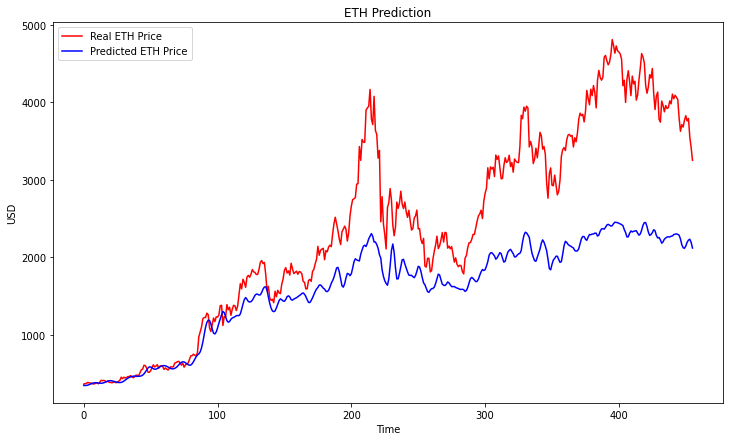

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(eth_b_adjclose, color = 'red', label = 'Real ETH Price')  # 紅線表示真實股價
plt.plot(predicted_eth_price, color = 'blue', label = 'Predicted ETH Price')  # 藍線表示預測股價
plt.title('ETH Prediction')
plt.xlabel('Time')
plt.ylabel('USD')
plt.legend()
plt.show()